In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
#import shap
import plotly.graph_objs as go
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
data = df.copy()

In [4]:
#Conversion to Numerical format
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

In [5]:
# Assigning numbers to Months
temp_data = data.copy()
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

In [6]:
def train_test(dataset, testSize, attrib='Revenue'):
  
  x = dataset.drop([attrib], axis=1)
  y = dataset[attrib]

  return train_test_split(x, y, test_size = testSize, random_state=12)

In [7]:
def evaluate_model(y_test, y_pred):

  acc = accuracy_score(y_test, y_pred)
  print('Testing Accuracy : ', acc)

  # classification report
  cr = classification_report(y_test, y_pred)
  print('Classification Report :')
  print(cr)

  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  TP, FN, FP, TN = cm[1][1], cm[1][0], cm[0][1],cm[0][0]

  # true positive rate
  TPR = TP/(TP+FN)
  # true negative rate
  TNR = TN/(TN+FP) 
  
  # false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)

  print('Sensitivity/tp_rate = ', TPR)
  print('Specificity/tn_rate = ', TNR)
  print('fp rate = ',FPR)
  print('fn rate = ',FNR)

  # confusion matrix
  
  print('Confusion Matrix :')
  
  plt.rcParams['figure.figsize'] = (6, 6)
  sns.heatmap(cm ,annot = True)

  return TPR, TNR, FPR, FNR

In [8]:
x_train, x_test, y_train, y_test = train_test(temp_data, 0.25)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train: (9247, 17)
Shape of x_test : (3083, 17)


In [9]:
sc = StandardScaler()

xsc_train = sc.fit_transform(x_train)
xsc_test = sc.fit_transform(x_test)

In [10]:
models_sc = []

Testing Accuracy :  0.7992215374635095
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      2608
           1       0.41      0.71      0.52       475

    accuracy                           0.80      3083
   macro avg       0.67      0.76      0.70      3083
weighted avg       0.86      0.80      0.82      3083

[[2129  479]
 [ 140  335]]
Sensitivity/tp_rate =  0.7052631578947368
Specificity/tn_rate =  0.8163343558282209
fp rate =  0.18366564417177914
fn rate =  0.29473684210526313
Confusion Matrix :


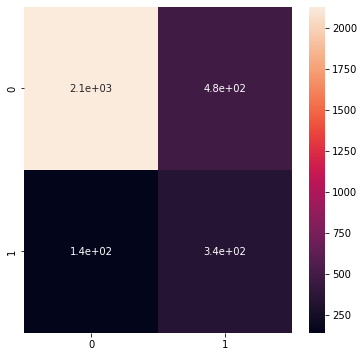

In [11]:
model = GaussianNB()

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'Naive Bayes', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8835549789166396
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2608
           1       0.73      0.39      0.51       475

    accuracy                           0.88      3083
   macro avg       0.81      0.68      0.72      3083
weighted avg       0.87      0.88      0.87      3083

[[2538   70]
 [ 289  186]]
Sensitivity/tp_rate =  0.391578947368421
Specificity/tn_rate =  0.973159509202454
fp rate =  0.026840490797546013
fn rate =  0.608421052631579
Confusion Matrix :


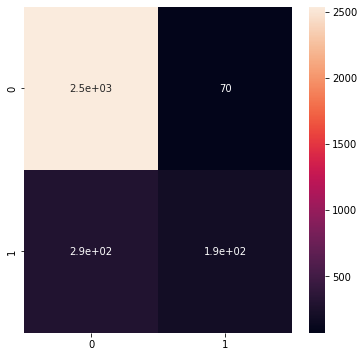

In [12]:
model = LogisticRegression()

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'Logistic Regression', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8303600389231268
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2608
           1       0.44      0.39      0.42       475

    accuracy                           0.83      3083
   macro avg       0.67      0.65      0.66      3083
weighted avg       0.82      0.83      0.83      3083

[[2373  235]
 [ 288  187]]
Sensitivity/tp_rate =  0.3936842105263158
Specificity/tn_rate =  0.9098926380368099
fp rate =  0.09010736196319018
fn rate =  0.6063157894736843
Confusion Matrix :


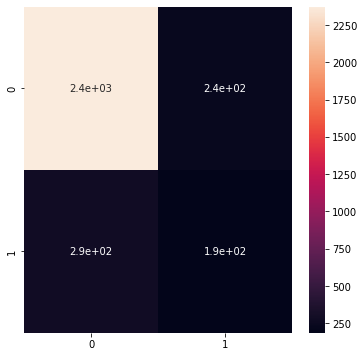

In [13]:
model = DecisionTreeClassifier()

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'Decision Tree', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.901719104768083
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2608
           1       0.73      0.57      0.64       475

    accuracy                           0.90      3083
   macro avg       0.83      0.77      0.79      3083
weighted avg       0.90      0.90      0.90      3083

[[2509   99]
 [ 204  271]]
Sensitivity/tp_rate =  0.5705263157894737
Specificity/tn_rate =  0.9620398773006135
fp rate =  0.037960122699386506
fn rate =  0.42947368421052634
Confusion Matrix :


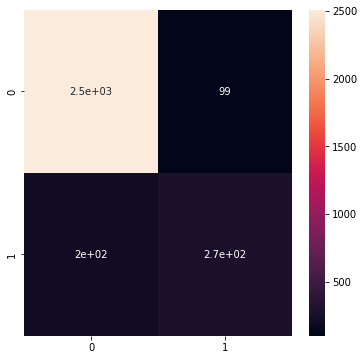

In [14]:
model = RandomForestClassifier()

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'Random Forest', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8796626662341874
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2608
           1       0.68      0.41      0.52       475

    accuracy                           0.88      3083
   macro avg       0.79      0.69      0.72      3083
weighted avg       0.87      0.88      0.87      3083

[[2515   93]
 [ 278  197]]
Sensitivity/tp_rate =  0.4147368421052632
Specificity/tn_rate =  0.964340490797546
fp rate =  0.03565950920245399
fn rate =  0.5852631578947368
Confusion Matrix :


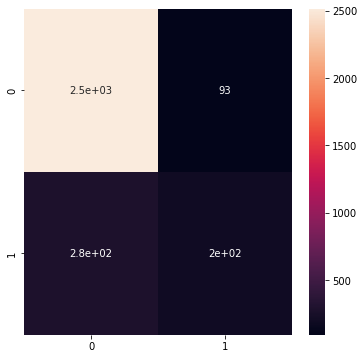

In [15]:
model = KNeighborsClassifier()

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'KNeighbors', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.892312682452157
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2608
           1       0.72      0.49      0.58       475

    accuracy                           0.89      3083
   macro avg       0.82      0.73      0.76      3083
weighted avg       0.88      0.89      0.88      3083

[[2520   88]
 [ 244  231]]
Sensitivity/tp_rate =  0.4863157894736842
Specificity/tn_rate =  0.9662576687116564
fp rate =  0.03374233128834356
fn rate =  0.5136842105263157
Confusion Matrix :


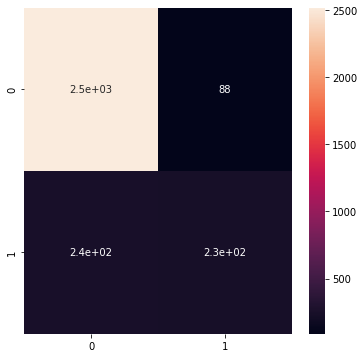

In [16]:
model = SVC(probability=True)

model.fit(xsc_train,y_train)

y_pred = model.predict(xsc_test)

models_sc.append({'model' : model, 'label': 'SVM', 'x_test': xsc_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

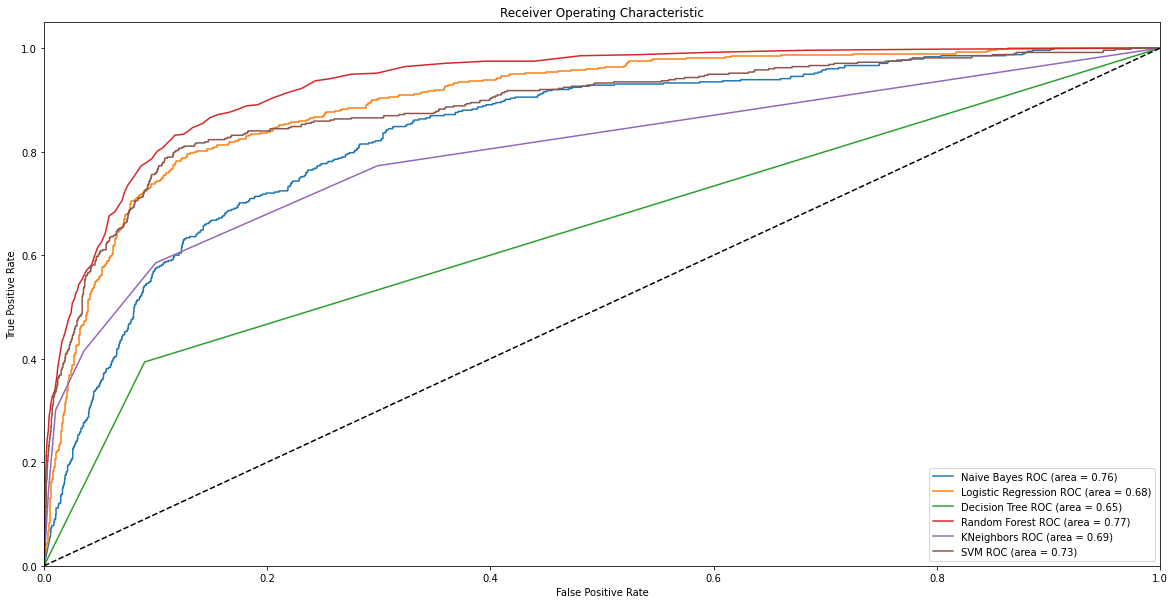

In [17]:
## ROC PLOT for Normalized data

plt.figure(figsize=(20,10))
for m in models_sc:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
def smote_data(X_train, y_train):
  smt = SMOTE()
  return smt.fit_resample(X_train, y_train)

In [19]:
x_train, x_test, y_train, y_test = train_test(temp_data, 0.25)
x_smot, y_smot = smote_data(x_train, y_train)

print("Shape of x_train after SMOTE:", x_smot.shape)
print("Shape of x_test after SMOTE :", x_test.shape)

Shape of x_train after SMOTE: (15628, 17)
Shape of x_test after SMOTE : (3083, 17)


In [20]:
models_smot = []

Testing Accuracy :  0.7810574116120662
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      2608
           1       0.39      0.73      0.51       475

    accuracy                           0.78      3083
   macro avg       0.66      0.76      0.68      3083
weighted avg       0.86      0.78      0.80      3083

[[2062  546]
 [ 129  346]]
Sensitivity/tp_rate =  0.728421052631579
Specificity/tn_rate =  0.7906441717791411
fp rate =  0.2093558282208589
fn rate =  0.27157894736842103
Confusion Matrix :


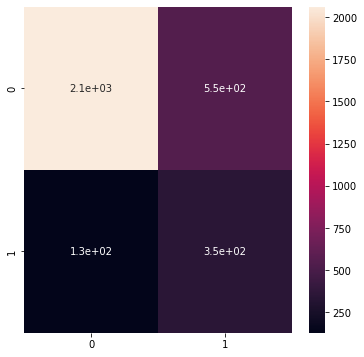

In [21]:
model = GaussianNB()

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'Naive Bayes (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

/home/warmachine-1102/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy :  0.8589036652611093
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2608
           1       0.53      0.72      0.61       475

    accuracy                           0.86      3083
   macro avg       0.74      0.80      0.76      3083
weighted avg       0.88      0.86      0.87      3083

[[2306  302]
 [ 133  342]]
Sensitivity/tp_rate =  0.72
Specificity/tn_rate =  0.88420245398773
fp rate =  0.11579754601226994
fn rate =  0.28
Confusion Matrix :


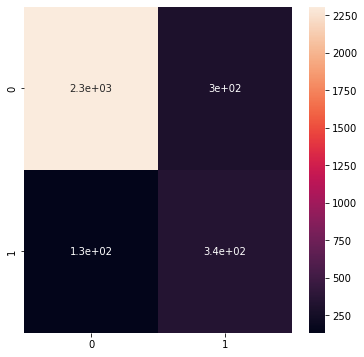

In [22]:
model = LogisticRegression(max_iter=3000)

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'Logistic Regression (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8546869931884528
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2608
           1       0.52      0.63      0.57       475

    accuracy                           0.85      3083
   macro avg       0.73      0.76      0.74      3083
weighted avg       0.87      0.85      0.86      3083

[[2335  273]
 [ 175  300]]
Sensitivity/tp_rate =  0.631578947368421
Specificity/tn_rate =  0.8953220858895705
fp rate =  0.10467791411042945
fn rate =  0.3684210526315789
Confusion Matrix :


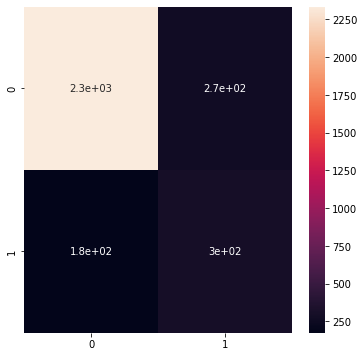

In [23]:
model = DecisionTreeClassifier()

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'Decision Tree (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.8965293545248135
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2608
           1       0.64      0.76      0.69       475

    accuracy                           0.90      3083
   macro avg       0.80      0.84      0.82      3083
weighted avg       0.91      0.90      0.90      3083

[[2404  204]
 [ 115  360]]
Sensitivity/tp_rate =  0.7578947368421053
Specificity/tn_rate =  0.9217791411042945
fp rate =  0.07822085889570553
fn rate =  0.24210526315789474
Confusion Matrix :


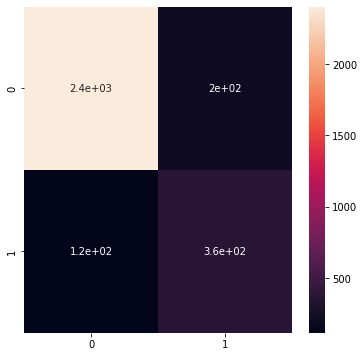

In [24]:
model = RandomForestClassifier()

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'Random Forest (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.7645150827116445
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2608
           1       0.36      0.67      0.47       475

    accuracy                           0.76      3083
   macro avg       0.64      0.72      0.66      3083
weighted avg       0.84      0.76      0.79      3083

[[2041  567]
 [ 159  316]]
Sensitivity/tp_rate =  0.6652631578947369
Specificity/tn_rate =  0.7825920245398773
fp rate =  0.2174079754601227
fn rate =  0.33473684210526317
Confusion Matrix :


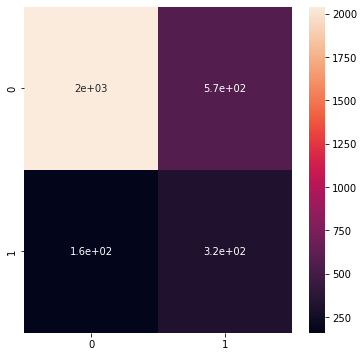

In [25]:
model = KNeighborsClassifier()

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'KNeighbors (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.7090496269867013
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2608
           1       0.32      0.76      0.45       475

    accuracy                           0.71      3083
   macro avg       0.63      0.73      0.62      3083
weighted avg       0.84      0.71      0.75      3083

[[1825  783]
 [ 114  361]]
Sensitivity/tp_rate =  0.76
Specificity/tn_rate =  0.6997699386503068
fp rate =  0.30023006134969327
fn rate =  0.24
Confusion Matrix :


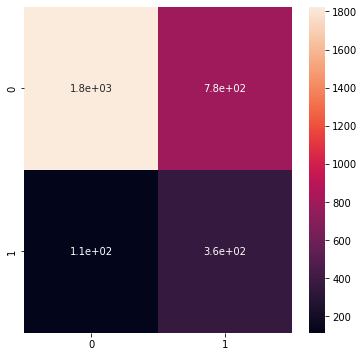

In [26]:
model = SVC(probability=True)

model.fit(x_smot,y_smot)

y_pred = model.predict(x_test)

models_smot.append({'model' : model, 'label': 'SVM (SMOT)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

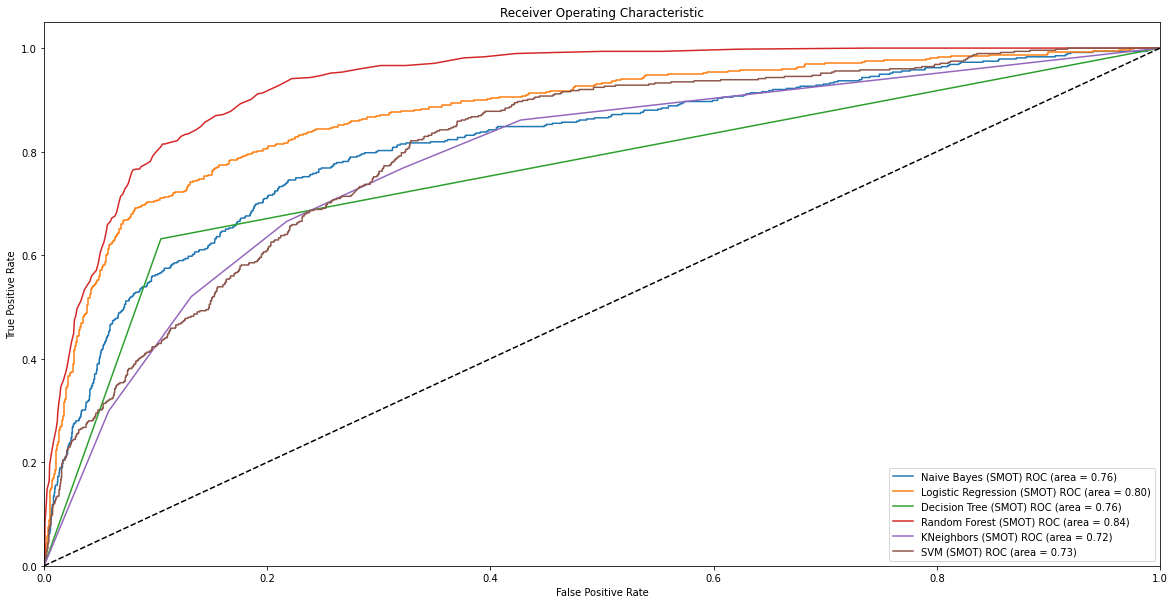

In [27]:
## ROC PLOT for SMOTE data

plt.figure(figsize=(20,10))
for m in models_smot:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
def near_miss_data(X_train, y_train):
    nr = NearMiss() 
    return nr.fit_resample(X_train, y_train)

In [29]:
x_train, x_test, y_train, y_test = train_test(temp_data, 0.25)
x_nr, y_nr = near_miss_data(x_train, y_train)

print("Shape of x_train after NR:", x_nr.shape)
print("Shape of x_test after NR:", x_test.shape)

Shape of x_train after NR: (2866, 17)
Shape of x_test after NR: (3083, 17)


In [30]:
models_NR = []

Testing Accuracy :  0.5241647745702238
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.45      0.61      2608
           1       0.24      0.95      0.38       475

    accuracy                           0.52      3083
   macro avg       0.61      0.70      0.50      3083
weighted avg       0.87      0.52      0.58      3083

[[1165 1443]
 [  24  451]]
Sensitivity/tp_rate =  0.9494736842105264
Specificity/tn_rate =  0.44670245398773006
fp rate =  0.55329754601227
fn rate =  0.05052631578947368
Confusion Matrix :


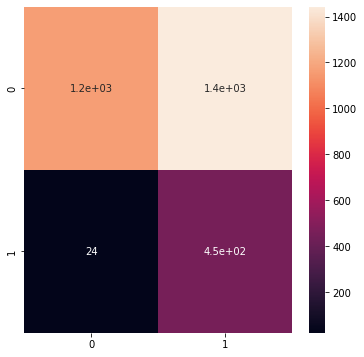

In [31]:
model = GaussianNB()

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'Naive Bayes (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.5377878689588064
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.46      0.63      2608
           1       0.24      0.95      0.39       475

    accuracy                           0.54      3083
   macro avg       0.61      0.71      0.51      3083
weighted avg       0.87      0.54      0.59      3083

[[1207 1401]
 [  24  451]]
Sensitivity/tp_rate =  0.9494736842105264
Specificity/tn_rate =  0.4628067484662577
fp rate =  0.5371932515337423
fn rate =  0.05052631578947368
Confusion Matrix :


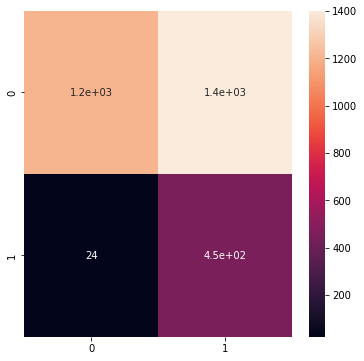

In [32]:
model = LogisticRegression(max_iter=3000)

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'Logistic Regression (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.5838469023678236
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      2608
           1       0.26      0.96      0.41       475

    accuracy                           0.58      3083
   macro avg       0.63      0.74      0.55      3083
weighted avg       0.87      0.58      0.64      3083

[[1345 1263]
 [  20  455]]
Sensitivity/tp_rate =  0.9578947368421052
Specificity/tn_rate =  0.5157208588957055
fp rate =  0.4842791411042945
fn rate =  0.042105263157894736
Confusion Matrix :


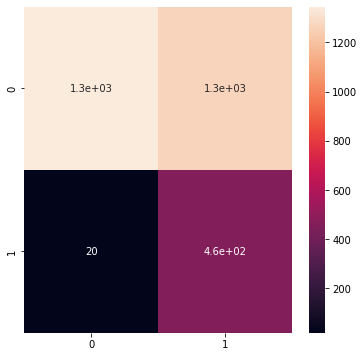

In [33]:
model = DecisionTreeClassifier()

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'Decision Tree (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.5358417126175803
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.46      0.63      2608
           1       0.24      0.96      0.39       475

    accuracy                           0.54      3083
   macro avg       0.61      0.71      0.51      3083
weighted avg       0.87      0.54      0.59      3083

[[1198 1410]
 [  21  454]]
Sensitivity/tp_rate =  0.9557894736842105
Specificity/tn_rate =  0.4593558282208589
fp rate =  0.5406441717791411
fn rate =  0.04421052631578947
Confusion Matrix :


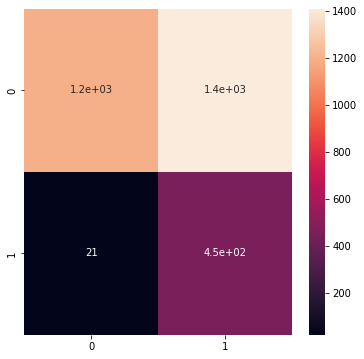

In [34]:
model = RandomForestClassifier()

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'Random Forest (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.47615958481998055
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.39      0.56      2608
           1       0.22      0.94      0.36       475

    accuracy                           0.48      3083
   macro avg       0.60      0.67      0.46      3083
weighted avg       0.86      0.48      0.53      3083

[[1020 1588]
 [  27  448]]
Sensitivity/tp_rate =  0.9431578947368421
Specificity/tn_rate =  0.3911042944785276
fp rate =  0.6088957055214724
fn rate =  0.056842105263157895
Confusion Matrix :


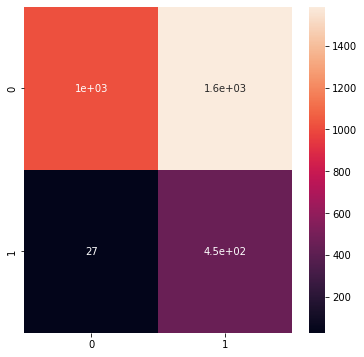

In [35]:
model = KNeighborsClassifier()

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'KNeighbors (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

Testing Accuracy :  0.47291599091793707
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.40      0.56      2608
           1       0.21      0.87      0.34       475

    accuracy                           0.47      3083
   macro avg       0.58      0.63      0.45      3083
weighted avg       0.83      0.47      0.53      3083

[[1047 1561]
 [  64  411]]
Sensitivity/tp_rate =  0.8652631578947368
Specificity/tn_rate =  0.4014570552147239
fp rate =  0.598542944785276
fn rate =  0.13473684210526315
Confusion Matrix :


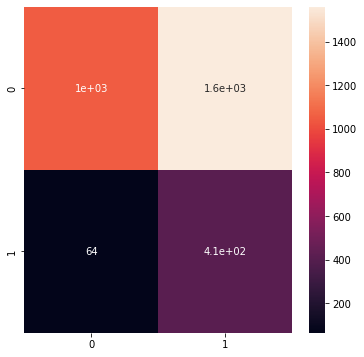

In [36]:
model = SVC(probability=True)

model.fit(x_nr,y_nr)

y_pred = model.predict(x_test)

models_NR.append({'model' : model, 'label': 'SVM (NR)', 'x_test': x_test, 'y_test': y_test})

TPR, TNR, FPR, FNR = evaluate_model(y_test, y_pred)

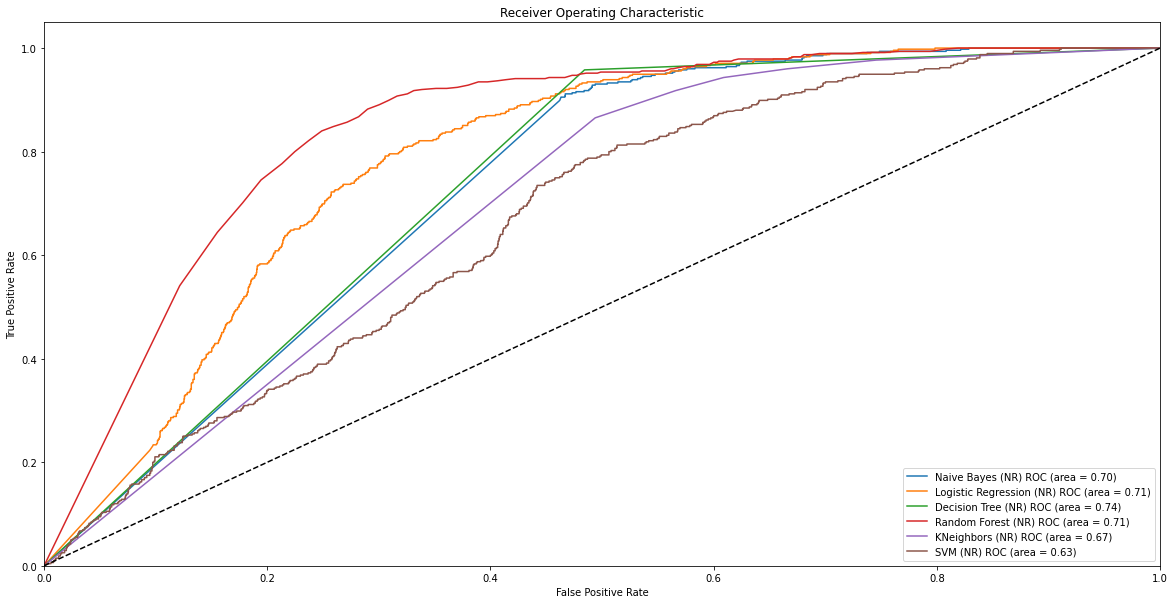

In [37]:
## ROC PLOT for NR data

plt.figure(figsize=(20,10))
for m in models_NR:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()